## Table of Contents

* [Introduction](#Introduction)
* [Project Scenario](#Project-Scenario)
* [Ask Phase](#Ask-Phase)
* [Prepare Phase](#Prepare-Phase)
* [Process Phase](#Process-Phase)
* [Analyze Phase](#Analyze-Phase)
* [Share Phase](#Share-Phase)
* [Act Phase](#Act-Phase)

<a id="Introduction"></a>
# Introduction 

As part of the [Google Data Analytics Professional Certificate](http://www.coursera.org/professional-certificates/google-data-analytics), I am excited to share my approach to the Cyclistic bike-share analysis case study. In this engaging case study, I am playing the role of a junior data analyst within the marketing team at Cyclistic, a fictional bike-share company based in Chicago, collaborating closely with key team members to tackle the business questions at hand and deliver insightful results.

To carry out the project successfully, I follow a well-defined set of steps. Google's certificate program outlines the data analysis process, which includes the following stages: asking the right questions, preparing the data, processing it effectively, analyzing the findings, sharing the results, and taking appropriate actions. Within this notebook, I present a practical demonstration of how I apply these steps to analyze the given dataset.

I've decided to go with the R programming language and the RStudio IDE for my analysis because it offers a range of user-friendly statistical analysis tools and data visualization capabilities.

I also challenged myself to recreate the same project in SQLite to hone my SQL problem-solving skills. [You can check it out here.](https://www.kaggle.com/code/esinsari/sql-cyclistic-bike-share-case-study-with-sql)


<a id="Project-Scenario"></a>
## Project Scenario

Cyclistic allows customers  the flexibility to pick up and drop off bikes at different stations within the system at their own convenience.  While the company's current marketing tactics have been effective in creating brand awareness and attracting various consumer segments through flexible pricing plans, the financial analysis has revealed that annual members generate significantly higher profits compared to casual riders. As a result, a shift towards targeting and converting more casual riders into annual members will be essential  for sustained growth.
To achieve this goal, the marketing team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics.


<a id="Ask-Phase"></a>
## 1. Ask Phase
 
Lily Moreno, our marketing director and my manager, has assigned me the important task of exploring **'How do annual members and casual riders use Cyclistic bikes differently?'** . By understanding how these two groups differ in their usage of Cyclistic bikes, we can tailor our marketing campaigns to better target each segment and encourage more people to become long-term members of our bike-sharing program.

<a id="Prepare-Phase"></a>
## 2. Prepare Phase

In order to identify trends, I will be closely examining the Cyclistic historical bike trip data over a 12-month period, starting from March 2023 and ending in February 2024. Motivate International Inc. has provided the data under this [license](http://www.divvybikes.com/data-license-agreement) for public access. The datasets, which are in the form of 'csv' files, can be found [here](http://divvy-tripdata.s3.amazonaws.com/index.html).





**Data Fields**


* ride_id -- unique identifier of a particular bike trip
* rideable_type -- type of bike used (classic bikes, electric bikes)
* started_at -- date and time when the bike was removed from a dock
* ended_at -- date and time when the bike was returned to a dock
* start_station_name -- location of the starting docking station
* start_station_id -- alphanumeric identifier of the starting dock
* end_station_name -- location of the ending docking station
* end_station_id -- alphanumeric identifier of the ending dock
* start_lat -- latitude of the starting docking station
* start_lng -- longitude of the starting docking station
* end_lat -- latitude of the ending docking station
* end_lng -- longitude of the ending docking station
* member_casual -- type of rider (casual rider or member)

In [1]:
# Install and load necessary packages

install.packages(c("tidyverse", "lubridate", "janitor", "data.table", "skimr", "leaflet"))


library(tidyverse)
library(ggplot2)
library(tibble)
library(lubridate)
library(janitor)
library(data.table)
library(skimr)
library(leaflet)
library(dplyr)
library(readr)
library(scales)
library(purrr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“packages ‘tidyverse’, ‘lubridate’, ‘janitor’, ‘data.table’, ‘skimr’, ‘leaflet’ are not available for this version of R

Versions of these packages for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflict

In [2]:
# Upload all csv files

mar23 <- read.csv("../input/cyclistic-bike-share-data/202303-divvy-tripdata.csv")
apr23 <- read.csv("../input/cyclistic-bike-share-data/202304-divvy-tripdata.csv")
may23 <- read.csv("../input/cyclistic-bike-share-data/202305-divvy-tripdata.csv")
jun23 <- read.csv("../input/cyclistic-bike-share-data/202306-divvy-tripdata.csv")
jul23 <- read.csv("../input/cyclistic-bike-share-data/202307-divvy-tripdata.csv")
aug23 <- read.csv("../input/cyclistic-bike-share-data/202308-divvy-tripdata.csv")
sep23 <- read.csv("../input/cyclistic-bike-share-data/202309-divvy-tripdata.csv")
oct23 <- read.csv("../input/cyclistic-bike-share-data/202310-divvy-tripdata.csv")
nov23 <- read.csv("../input/cyclistic-bike-share-data/202311-divvy-tripdata.csv")
dec23 <- read.csv("../input/cyclistic-bike-share-data/202312-divvy-tripdata.csv")
jan24 <- read.csv("../input/cyclistic-bike-share-data/202401-divvy-tripdata.csv")
feb24 <- read.csv("../input/cyclistic-bike-share-data/202402-divvy-tripdata.csv")

<a id="Process-Phase"></a>
## 3. Process Phase

* After a detailed examination of the structure, I have verified that all 12 CSV files have shared attributes, such as matching column names and data types.


In [3]:
# the colnames() function for ensuring data consistency before combining them into a single file

colnames(jan24)
colnames(feb24)
colnames(mar23)
colnames(apr23)
colnames(may23)
colnames(jun23) 
colnames(jul23)
colnames(aug23)
colnames(sep23)
colnames(oct23)
colnames(nov23)
colnames(dec23)


[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [4]:
# Validating Data Types: check that each monthly data set consists of the same data type using the compare_df_cols function

compare_df_cols(mar23,apr23,may23, jun23, jul23,aug23,sep23, oct23, nov23, dec23, jan24, feb24,
return = "match")

column_name,mar23,apr23,may23,jun23,jul23,aug23,sep23,oct23,nov23,dec23,jan24,feb24
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
end_lat,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric
end_lng,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric
end_station_id,character,character,character,character,character,character,character,character,character,character,character,character
end_station_name,character,character,character,character,character,character,character,character,character,character,character,character
ended_at,character,character,character,character,character,character,character,character,character,character,character,character
member_casual,character,character,character,character,character,character,character,character,character,character,character,character
ride_id,character,character,character,character,character,character,character,character,character,character,character,character
rideable_type,character,character,character,character,character,character,character,character,character,character,character,character
start_lat,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric


* I merged them into a single file to aggregate the trip data from the last 12 months for analysis.

In [5]:
# Combining data that has been separated by time frame

tripdata <- bind_rows(jan24, feb24, mar23, apr23, may23, jun23, jul23, aug23, sep23, oct23, nov23, dec23)

* The new table which I used for my analysis contains 13 columns and 5707168 rows.

In [6]:
# Inspect merged data frame that has been created

nrow(tripdata)  #How many rows are in the data frame?
dim(tripdata)  #Dimensions of the data frame?
head(tripdata)  #See the first 6 rows of the data frame. 
str(tripdata)  #See list of columns and data types
summary(tripdata)  #Statistical summary of data. 

[1] 5707168

[1] 5707168      13

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90327,-87.63474,41.88918,-87.63851,member
2,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90294,-87.63444,41.88918,-87.63851,member
3,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90295,-87.63447,41.88918,-87.63851,member
4,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.88430,-87.63396,41.92182,-87.64414,member
5,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.94880,-87.67528,41.88918,-87.63851,member
6,C96080812CD285C5,classic_bike,2024-01-07 11:21:24,2024-01-07 11:30:03,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90322,-87.63432,41.88918,-87.63851,member


'data.frame':	5707168 obs. of  13 variables:
 $ ride_id           : chr  "C1D650626C8C899A" "EECD38BDB25BFCB0" "F4A9CE78061F17F7" "0A0D9E15EE50B171" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "classic_bike" ...
 $ started_at        : chr  "2024-01-12 15:30:27" "2024-01-08 15:45:46" "2024-01-27 12:27:19" "2024-01-29 16:26:17" ...
 $ ended_at          : chr  "2024-01-12 15:37:59" "2024-01-08 15:52:59" "2024-01-27 12:35:19" "2024-01-29 16:56:06" ...
 $ start_station_name: chr  "Wells St & Elm St" "Wells St & Elm St" "Wells St & Elm St" "Wells St & Randolph St" ...
 $ start_station_id  : chr  "KA1504000135" "KA1504000135" "KA1504000135" "TA1305000030" ...
 $ end_station_name  : chr  "Kingsbury St & Kinzie St" "Kingsbury St & Kinzie St" "Kingsbury St & Kinzie St" "Larrabee St & Webster Ave" ...
 $ end_station_id    : chr  "KA1503000043" "KA1503000043" "KA1503000043" "13193" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng        

   ride_id          rideable_type       started_at          ended_at        
 Length:5707168     Length:5707168     Length:5707168     Length:5707168    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:5707168     Length:5707168     Length:5707168     Length:5707168    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

* I use the duplicated() function to identify any duplicate values in the "ride_id" column, as each ride ID is expected to be unique.

In [7]:
# Check for duplicate values in the "ride_id" column 

paste('Number of duplicates in the ride_id column : ', sum(duplicated(tripdata$ride_id)))

[1] "Number of duplicates in the ride_id column :  0"

* I extract and organize date-related data from the started_at column into separate columns, including date, month, day, year, and day_of_week.


In [8]:
# Add columns that list the date, month, day, and year of each ride

tripdata$date <- as.Date(tripdata$started_at) #The default format is yyyy-mm-dd
tripdata$month <- format(as.Date(tripdata$date), "%b") 
tripdata$day <- format(as.Date(tripdata$date), "%d")
tripdata$year <- format(as.Date(tripdata$date), "%Y")
tripdata$day_of_week <- format(as.Date(tripdata$date), "%A")

* To calculate the duration of each trip, I create a new column called 'ride_length,' calculated by subtracting 'started_at' from 'ended_at. Then I convert the "ride_length" value from factor to numeric so I can perform calculations on the data.


In [9]:
# Add a "ride_length" calculation to tripdata (in minutes) and convert "ride_length" to numeric

tripdata$ride_length <- round(as.numeric(difftime(tripdata$ended_at, tripdata$started_at, units = "mins")), 2)

* Taking the time to review the structure of the columns to identify missing values, outliers, or any other issues before proceeding with the analysis is a best practice that can lead to more accurate and reliable results. 


In [10]:
# Gaining insights into the structure of tripdata

str(tripdata)

'data.frame':	5707168 obs. of  19 variables:
 $ ride_id           : chr  "C1D650626C8C899A" "EECD38BDB25BFCB0" "F4A9CE78061F17F7" "0A0D9E15EE50B171" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "classic_bike" ...
 $ started_at        : chr  "2024-01-12 15:30:27" "2024-01-08 15:45:46" "2024-01-27 12:27:19" "2024-01-29 16:26:17" ...
 $ ended_at          : chr  "2024-01-12 15:37:59" "2024-01-08 15:52:59" "2024-01-27 12:35:19" "2024-01-29 16:56:06" ...
 $ start_station_name: chr  "Wells St & Elm St" "Wells St & Elm St" "Wells St & Elm St" "Wells St & Randolph St" ...
 $ start_station_id  : chr  "KA1504000135" "KA1504000135" "KA1504000135" "TA1305000030" ...
 $ end_station_name  : chr  "Kingsbury St & Kinzie St" "Kingsbury St & Kinzie St" "Kingsbury St & Kinzie St" "Larrabee St & Webster Ave" ...
 $ end_station_id    : chr  "KA1503000043" "KA1503000043" "KA1503000043" "13193" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng        

* The data frame includes a few hundred entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was recorded as negative. As a result of removing this data, I have created a new version of the dataframe ,referred to as v2.

In [11]:
# The dataframe includes a few hundred entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative or zero

tripdata_v2 <- tripdata[!(tripdata$start_station_name == "HQ QR" | tripdata$ride_length <= 0),]

<a id="Analyze-Phase"></a>
## 4. Analyze Phase

* The summary() function was employed to derive various statistical measures, including the minimum, maximum, average, and median values of ride_length. By running this function, I was able to quickly gather important insights into the distribution and central tendencies of the data.


In [12]:
# Descriptive analysis on ride_length (all figures in minutes)

summary(tripdata_v2$ride_length)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.02     5.47     9.58    18.33    16.98 98489.07 

* To compare members and casual users, I generated summary statistics for each user type.

In [13]:
# Calculate mean, median, max, and min ride lengths for each user type

tripdata_v2 %>%
  group_by(member_casual) %>%
  summarize(
    mean_ride_length = mean(ride_length),
    median_ride_length = median(ride_length),
    max_ride_length = max(ride_length),
    min_ride_length = min(ride_length)
  )


member_casual,mean_ride_length,median_ride_length,max_ride_length,min_ride_length
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
casual,28.31124,11.92,98489.07,0.02
member,12.75035,8.57,1559.67,0.02


After reviewing the results, I observed several anomalies. Specifically:

Casual riders have a mean ride length of approximately 28.3 minutes, whereas for members, it is approximately 12.8 minutes. The median ride length for casual riders is about 11.9 minutes, compared to approximately 8.57 minutes for members. It's worth mentioning that there is a notable difference between the mean and median ride lengths for both casual riders and members, indicating that there are some exceptionally long rides that affect the overall distribution.

One notable outlier is the maximum ride length for casual riders, which is exceptionally high at 98,489 minutes (about 68 days). Such a longer duration seems unlikely and may indicate data entry errors or outliers that require further investigation. In addition, both casual riders and members have a minimum ride length of 0.02 minutes, which requires filtering or correction in the analysis.


In [14]:
# Filter out excessively long ride lengths (longer than a day) and rides less than 2 minutes

tripdata_v2 <- tripdata_v2[!(tripdata_v2$ride_length >= 1440 | tripdata_v2$ride_length < 2), ]

* I examine the rideable_type and member_casual columns to ensure their consistency, checking for any  potential issues. 

In [15]:
# Check member_casual and rideable_type column to if there are any discrepancies

unique(tripdata_v2$member_casual)

unique(tripdata_v2$rideable_type)

[1] "member" "casual"

[1] "electric_bike" "classic_bike"  "docked_bike"

* By calculating the percentage of members and casual riders who have used Cyclistic bike-sharing service and presenting it visually, I provide a comprehensive overview of the user demographics. This analysis helps us understand the popularity of the service among different user types.


In [16]:
# Percentage Distribution of User Type

user_data <- tripdata_v2 %>%
  group_by(member_casual) %>%
  summarize(number_of_rides= n()) %>%
  mutate(overall_total = sum(number_of_rides)) %>%
  group_by(member_casual) %>%
  summarize(percentage_of_totalrides = round(number_of_rides / overall_total * 100, 2))

print(user_data)



# A tibble: 2 × 2
  member_casual percentage_of_totalrides
  <chr>                            <dbl>
1 casual                            36.0
2 member                            64.0


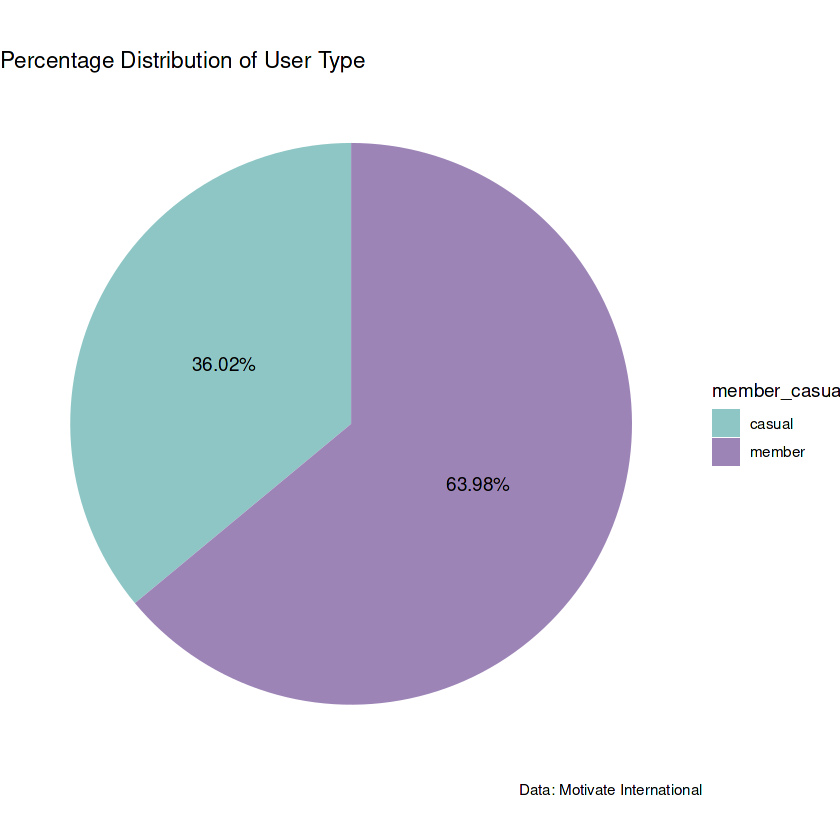

In [17]:
ggplot(user_data, aes(x = "", y = percentage_of_totalrides, fill = member_casual)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) + 
  labs(title = "Percentage Distribution of User Type", caption = "Data: Motivate International") +  
  theme_void() +  
  theme(legend.position = "right") + 
  scale_fill_manual(values = c("member" = "#9D84B7", "casual" = "#8EC6C5")) +
  geom_text(aes(label = paste0(percentage_of_totalrides, "%")),
            position = position_stack(vjust = 0.5))

**Result:** The data shows that when it comes to using the Cyclistic bike-sharing service, members take the lead with a larger share (63.98%) of the total rides, leaving casual riders with a smaller percentage (36.02%). This information suggests that Cyclistic bike-sharing service is preferred by members over casual riders. Furthermore, my objective was to identify the bike type that is favored by various users and present the outcomes visually.


In [18]:
# The use of bike types between members and casual riders

combined_data <- tripdata_v2 %>%
  count(member_casual, rideable_type) %>%  
  rename(User_Type = member_casual, Counts = n)

print(combined_data)


  User_Type rideable_type  Counts
1    casual  classic_bike  860050
2    casual   docked_bike   71939
3    casual electric_bike 1028217
4    member  classic_bike 1778636
5    member electric_bike 1703233


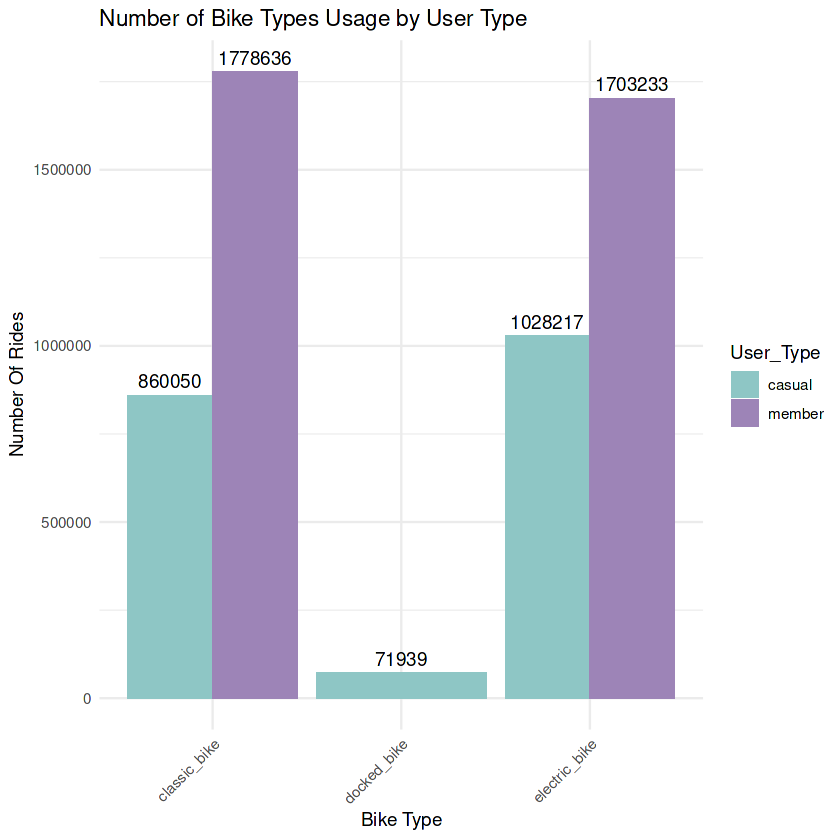

In [19]:
ggplot(combined_data, aes(x = rideable_type, y = Counts, fill = User_Type)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Number of Bike Types Usage by User Type",
       x = "Bike Type", y = "Number Of Rides") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = c("member" = "#9D84B7", "casual" = "#8EC6C5")) +
  geom_text(aes(label = Counts), position = position_dodge(width = 0.9), vjust = -0.5)


**Result:** It's clear that the classic bike remains the top choice for most members, with 1,778,636 rides. Electric bikes, on the other hand, are popular among casual riders, totaling 1,028,217 rides. Docked bikes, however, lag behind with just 71,939 rides, primarily used by casual riders.


* The number of rides and the average ride length are carefully examined  for each day of the week and for each user type. 

In [20]:
# Specify the days of the week in the desired order and analyze ridership data by each day for members vs casual riders

tripdata_v2$day_of_week <- ordered(tripdata_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))


result <- tripdata_v2 %>% 
  group_by(member_casual, day_of_week) %>% 
  summarise(number_of_rides = n(),
            average_duration = round(mean(ride_length), 2), .groups = "drop") %>% 
  arrange(member_casual, day_of_week)

print(result)


# A tibble: 14 × 4
   member_casual day_of_week number_of_rides average_duration
   <chr>         <ord>                 <int>            <dbl>
 1 casual        Sunday               314403             25.2
 2 casual        Monday               223046             21.4
 3 casual        Tuesday              233246             19.5
 4 casual        Wednesday            239063             18.5
 5 casual        Thursday             262864             18.8
 6 casual        Friday               298859             21.0
 7 casual        Saturday             388725             24.5
 8 member        Sunday               379332             14.1
 9 member        Monday               469072             12.1
10 member        Tuesday              541749             12.3
11 member        Wednesday            567445             12.2
12 member        Thursday             577550             12.2
13 member        Friday               504546             12.6
14 member        Saturday             442175       

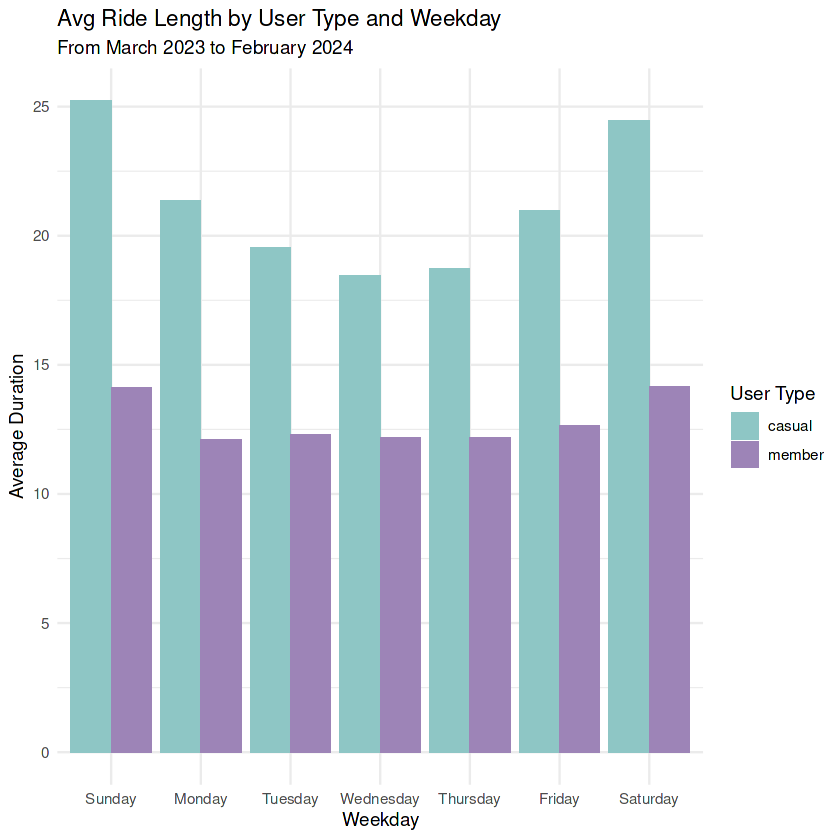

In [21]:
ggplot(result, aes(x = day_of_week, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(x = "Weekday", y = "Average Duration", fill = "User Type",
       title = "Avg Ride Length by User Type and Weekday",
       subtitle = "From March 2023 to February 2024") + 
  scale_fill_manual(values = c("member" = "#9D84B7", "casual" = "#8EC6C5")) +
  theme_minimal()



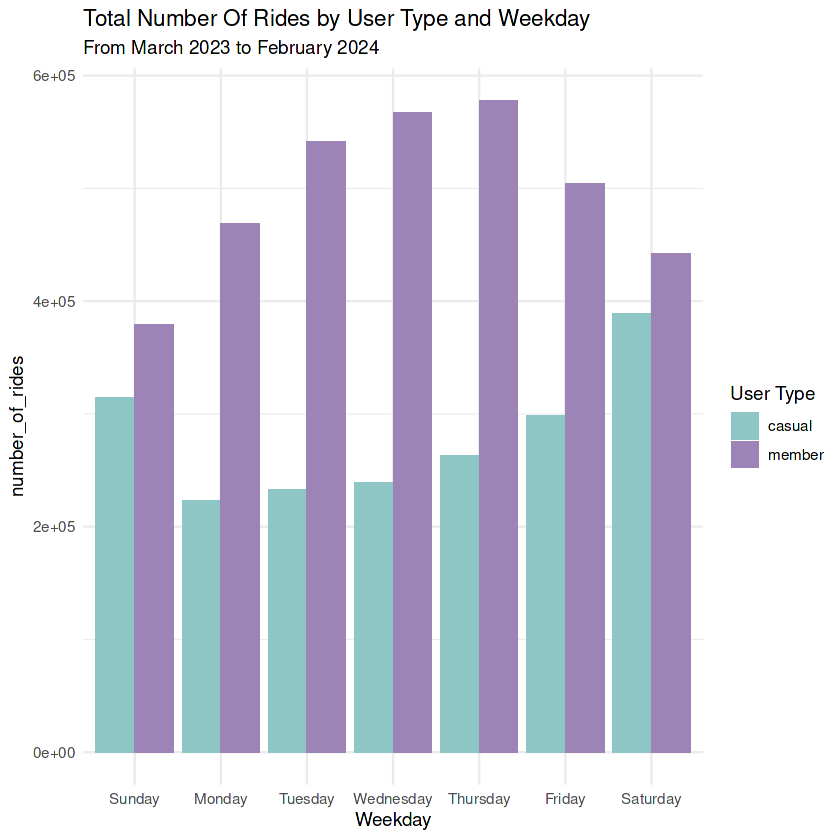

In [22]:
ggplot(result, aes(x = day_of_week, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(x = "Weekday", y = "number_of_rides", fill = "User Type", 
       title = "Total Number Of Rides by User Type and Weekday",
       subtitle = "From March 2023 to February 2024") +
  scale_fill_manual(values = c("member" = "#9D84B7", "casual" = "#8EC6C5")) +
  theme_minimal()

**Result:** Casual riders demonstrate a significant increase in both the number of rides and average ride durations on weekends. This suggests that people are more likely to prefer bike sharing service on weekends likely due to their increased availability of free time for leisure activities or longer trips. Members, on the other hand, have a significantly higher number of rides compared to casual riders and maintain a more consistent usage pattern on weekdays than on weekends , as they heavily rely on the bike-sharing service for their daily commute.


* To validate the accuracy of my previous findings, I took a closer look at how riders' usage patterns change throughout the day. This examination enabled me to uncover the nuances in how people utilize the service at different times

In [23]:
# Number of Rides per Hour for Casual Riders and Members

tripdata_v2 <- tripdata_v2 %>%
  mutate(hour_of_day = format(as.POSIXct(started_at), "%I %p"))

rides_per_hour <- tripdata_v2 %>%
  group_by(member_casual, hour_of_day) %>%
  summarise(num_of_rides = n(), .groups = 'drop') 


print(rides_per_hour, n = nrow(rides_per_hour))

# A tibble: 48 × 3
   member_casual hour_of_day num_of_rides
   <chr>         <chr>              <int>
 1 casual        01 AM              22465
 2 casual        01 PM             130108
 3 casual        02 AM              13491
 4 casual        02 PM             135460
 5 casual        03 AM               7446
 6 casual        03 PM             151504
 7 casual        04 AM               5532
 8 casual        04 PM             174154
 9 casual        05 AM              10700
10 casual        05 PM             190693
11 casual        06 AM              28276
12 casual        06 PM             164159
13 casual        07 AM              50409
14 casual        07 PM             121061
15 casual        08 AM              67755
16 casual        08 PM              87459
17 casual        09 AM              66802
18 casual        09 PM              73203
19 casual        10 AM              82845
20 casual        10 PM              64986
21 casual        11 AM             105417
22 casual      

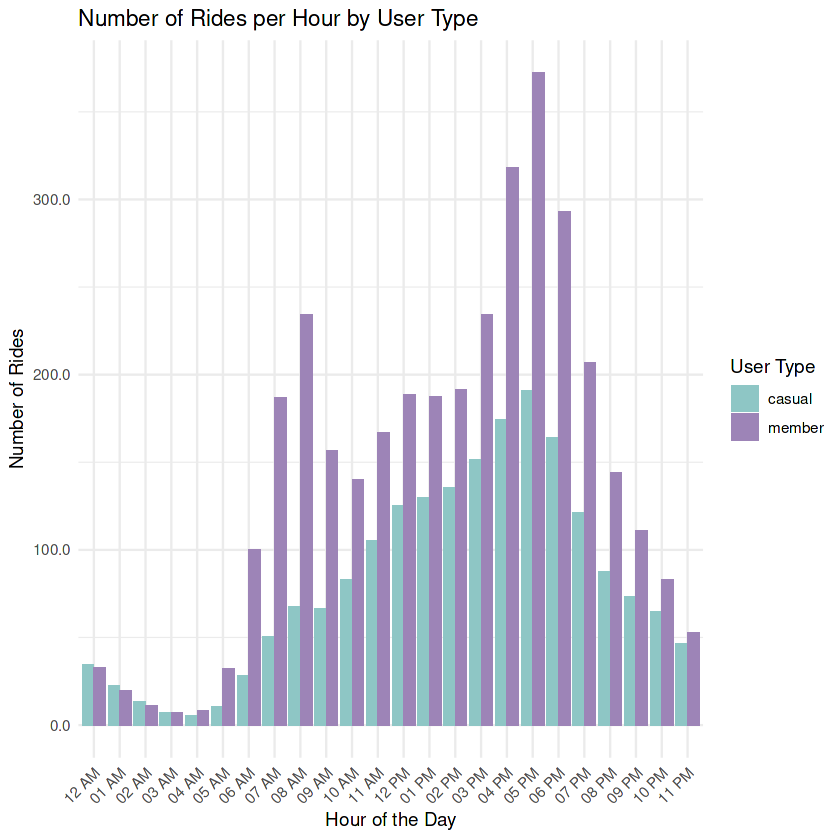

In [24]:
ggplot(rides_per_hour, aes(x = hour_of_day, y = num_of_rides, fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Number of Rides per Hour by User Type",
       x = "Hour of the Day", y = "Number of Rides",
       fill = "User Type") +
  scale_fill_manual(values = c("member" = "#9D84B7", "casual" = "#8EC6C5")) +
  theme_minimal() +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_x_discrete(limits = c("12 AM", "01 AM", "02 AM", "03 AM", "04 AM", "05 AM", 
                              "06 AM", "07 AM", "08 AM", "09 AM", "10 AM", "11 AM", 
                              "12 PM", "01 PM", "02 PM", "03 PM", "04 PM", "05 PM", 
                              "06 PM", "07 PM", "08 PM", "09 PM", "10 PM", "11 PM")) +
  scale_y_continuous(labels = scales::comma_format(scale = 1e-3, accuracy = 0.1)) 



**Result:**  Casual riders and members have different peak hours when it comes to using the service. For casual riders, the peak hours are typically in the afternoon and early evening, between 12 PM and 6 PM. On the other hand, members tend to have a more consistent usage pattern throughout the day. They tend to use the service more during morning commutes, from 7 am to 9 am, as well as in the evenings, from 4 pm to 8 pm.


* I want to discover popular seasons and months for biking.


In [25]:
# Let's get insights into how average ride durations and number of rides vary across different months and seasons ((from march 2023 to february 2024)) for each type of user


tripdata_v2$month <- ordered(tripdata_v2$month, levels=c("Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Jan", "Feb"))

result2 <- tripdata_v2 %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n(),
            average_duration = mean(ride_length), .groups = "drop") %>% 
  arrange(member_casual, month)

print(result2, n = nrow(result2))


# A tibble: 24 × 4
   member_casual month number_of_rides average_duration
   <chr>         <ord>           <int>            <dbl>
 1 casual        Mar             59133             16.1
 2 casual        Apr            139990             21.7
 3 casual        May            223304             23.1
 4 casual        Jun            288044             22.7
 5 casual        Jul            316965             23.8
 6 casual        Aug            298520             22.7
 7 casual        Sep            251598             21.9
 8 casual        Oct            169954             19.7
 9 casual        Nov             94577             16.6
10 casual        Dec             49546             15.2
11 casual        Jan             23185             14.3
12 casual        Feb             45390             18.7
13 member        Mar            183565             10.8
14 member        Apr            262026             12.2
15 member        May            351231             13.2
16 member        Jun         

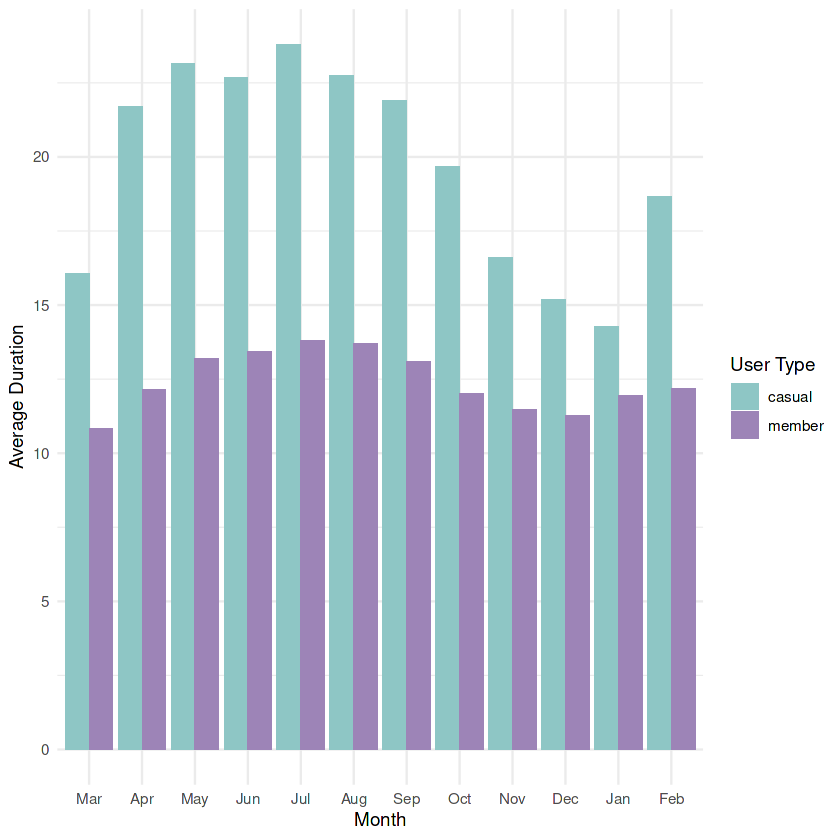

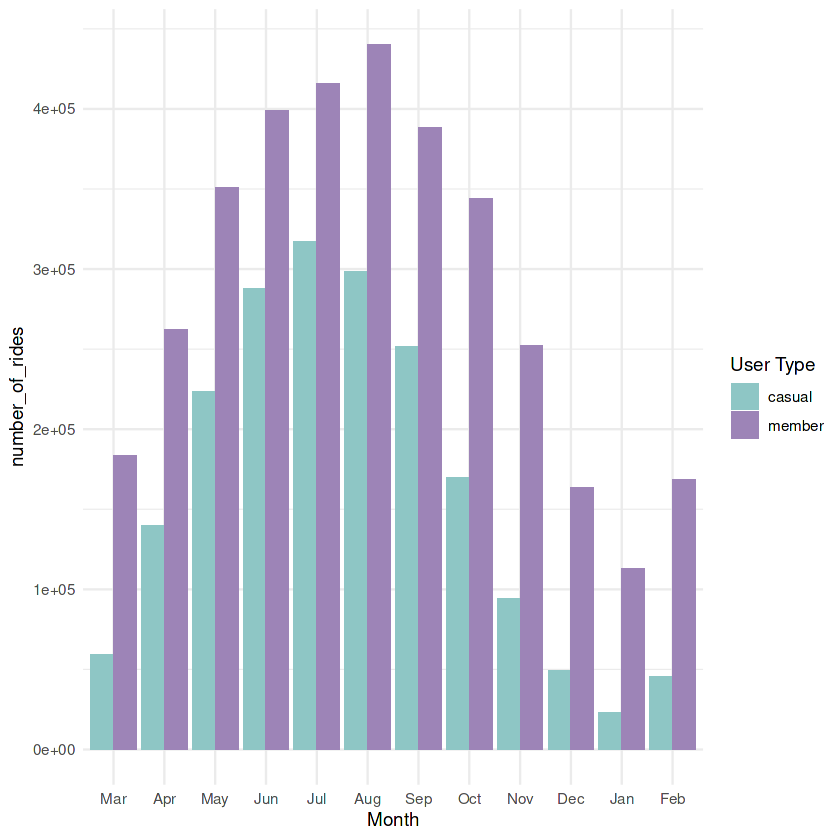

In [26]:
ggplot(result2, aes(x = month, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(x = "Month", y = "Average Duration", fill = "User Type") +
  scale_fill_manual(values = c("member" = "#9D84B7", "casual" = "#8EC6C5")) +
  theme_minimal()

ggplot(result2, aes(x = month, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(x = "Month", y = "number_of_rides", fill = "User Type") +
  scale_fill_manual(values = c("member" = "#9D84B7", "casual" = "#8EC6C5")) +
  theme_minimal()



In [27]:
result2 <- tripdata_v2 %>%
  mutate(season = case_when(
    month %in% c("Dec", "Jan", "Feb") ~ "Winter",
    month %in% c("Mar", "Apr", "May") ~ "Spring",
    month %in% c("Jun", "Jul", "Aug") ~ "Summer",
    month %in% c("Sep", "Oct", "Nov") ~ "Fall"
  )) %>%
  group_by(member_casual, season) %>%
  summarise(number_of_rides = n(),
            average_duration = mean(ride_length), .groups = "drop") %>%
  arrange(member_casual, season)

print(result2, n = nrow(result2))



# A tibble: 8 × 4
  member_casual season number_of_rides average_duration
  <chr>         <chr>            <int>            <dbl>
1 casual        Fall            516129             20.2
2 casual        Spring          422427             21.7
3 casual        Summer          903529             23.1
4 casual        Winter          118121             16.4
5 member        Fall            984773             12.3
6 member        Spring          796822             12.3
7 member        Summer         1254851             13.7
8 member        Winter          445423             11.8


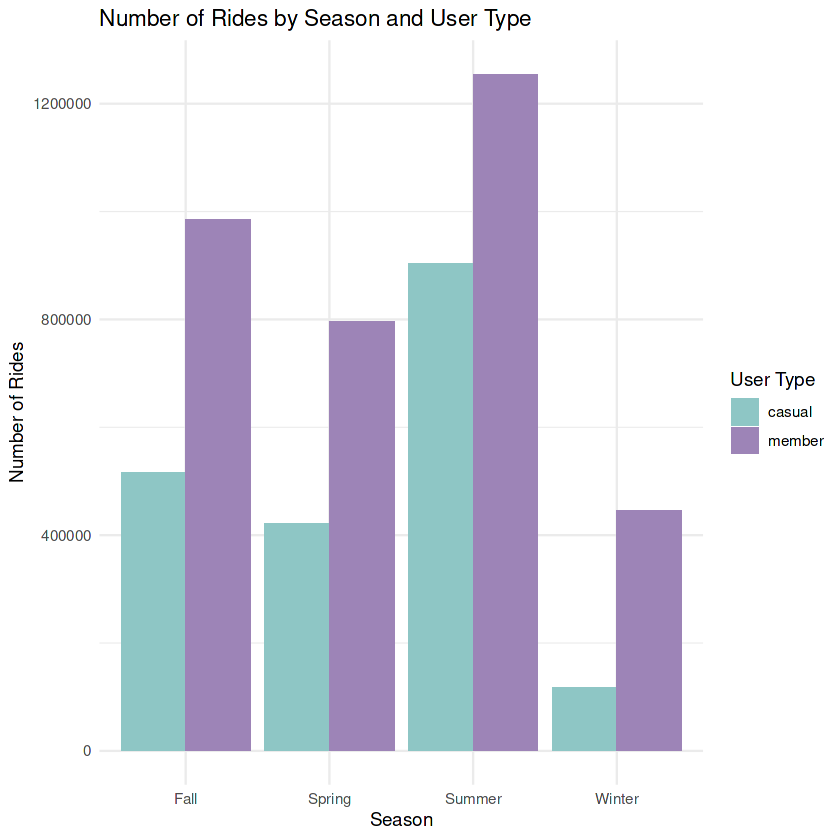

In [28]:
ggplot(result2, aes(x = season, y = number_of_rides, fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Number of Rides by Season and User Type",
       x = "Season",
       y = "Number of Rides",
       fill = "User Type") +
scale_fill_manual(values = c("member" = "#9D84B7", "casual" = "#8EC6C5")) +
  theme_minimal()


**Result:**  By analyzing the data on riding behavior throughout the different seasons, it becomes evident that there is a correlation between weather and the frequency and duration of bike rides. The findings suggest that both casual riders and members tend to be more active during the warmer months (June to August), which is understandable given the more favorable riding conditions. 

* To find the top 10 most popular start stations for both members and casual riders, I will filter out any rows where the start_station_name is missing. Once I have narrowed down the data set, I will then make sure that the start station names are unique and sorted in the correct order based on the number of rides. This way, the visualization will clearly show the top start stations for each user type.  After identifying the top start stations, I will also apply similar calculations to determine the top 10 most popular end stations for both members and casual riders. By following these steps, I will be able to create a comprehensive analysis of the most frequently used stations by different user types. 

In [29]:
#identify the top 10 most popular start stations by user type

start_station_counts <- tripdata_v2 %>%
  group_by(member_casual, start_station_name) %>%
  summarise(number_of_rides = n(),.groups = "drop")

start_station_clear <- start_station_counts %>%  
filter(!is.na(start_station_name) & start_station_name != "")


top_start_stations <- start_station_clear %>%
  group_by(member_casual) %>%
  top_n(10, number_of_rides) %>%
  arrange(member_casual, desc(number_of_rides)) %>%
  mutate(rank = row_number())

print(top_start_stations)

top_start_stations$start_station_name <- paste(top_start_stations$start_station_name, top_start_stations$rank, sep = "_")

top_start_stations$start_station_name <- factor(top_start_stations$start_station_name, 
                                                levels = rev(top_start_stations$start_station_name))


# A tibble: 20 × 4
# Groups:   member_casual [2]
   member_casual start_station_name                 number_of_rides  rank
   <chr>         <chr>                                        <int> <int>
 1 casual        Streeter Dr & Grand Ave                      44304     1
 2 casual        DuSable Lake Shore Dr & Monroe St            29403     2
 3 casual        Michigan Ave & Oak St                        21991     3
 4 casual        DuSable Lake Shore Dr & North Blvd           19744     4
 5 casual        Millennium Park                              19301     5
 6 casual        Shedd Aquarium                               16980     6
 7 casual        Theater on the Lake                          15866     7
 8 casual        Dusable Harbor                               14912     8
 9 casual        Wells St & Concord Ln                        11719     9
10 casual        Adler Planetarium                            11536    10
11 member        Clinton St & Washington Blvd                 2

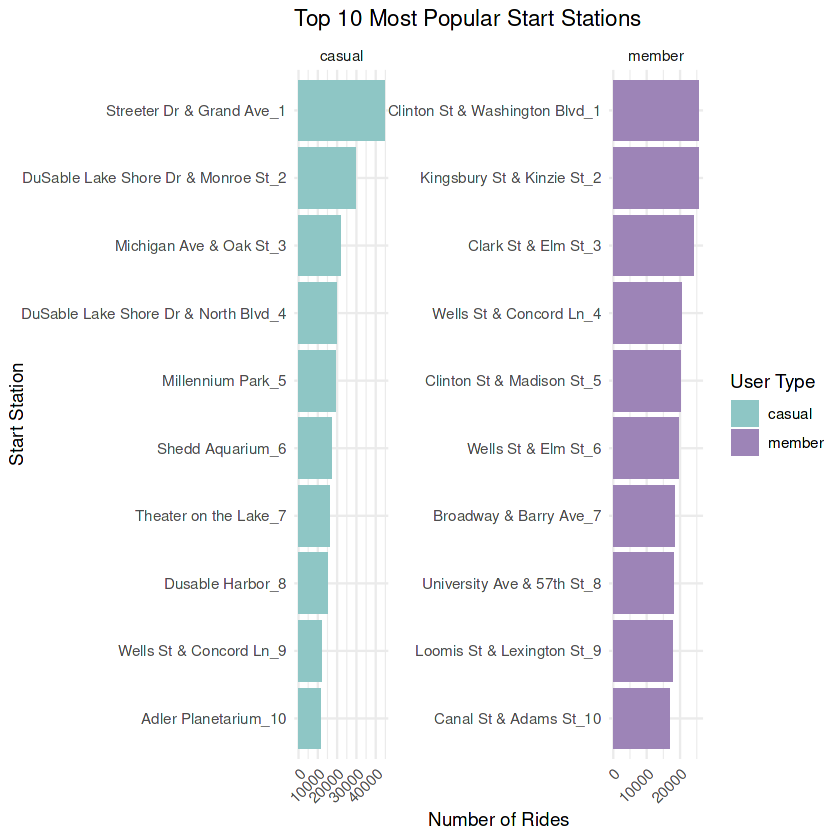

In [30]:

ggplot(top_start_stations, aes(x = number_of_rides, y = start_station_name, fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Top 10 Most Popular Start Stations",
       x = "Number of Rides",
       y = "Start Station",
       fill = "User Type") +
  scale_fill_manual(values = c("member" = "#9D84B7", "casual" = "#8EC6C5")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  facet_wrap(~ member_casual, scales = "free")


In [31]:
#identify the top 10 most popular end stations by user type

end_station_counts <- tripdata_v2 %>%
  group_by(member_casual, end_station_name) %>%
  summarise(number_of_rides = n(),.groups = "drop")

end_station_clear <- end_station_counts %>%  
  filter(!is.na(end_station_name) & end_station_name != "")


top_end_stations <- end_station_clear %>%
  group_by(member_casual) %>%
  top_n(10, number_of_rides) %>%
  arrange(member_casual, desc(number_of_rides)) %>%
  mutate(rank = row_number())

print(top_end_stations)

top_end_stations$end_station_name <- paste(top_end_stations$end_station_name, top_end_stations$rank, sep = "_")

top_end_stations$end_station_name <- factor(top_end_stations$end_station_name, 
                                                levels = rev(top_end_stations$end_station_name))



# A tibble: 20 × 4
# Groups:   member_casual [2]
   member_casual end_station_name                   number_of_rides  rank
   <chr>         <chr>                                        <int> <int>
 1 casual        Streeter Dr & Grand Ave                      47964     1
 2 casual        DuSable Lake Shore Dr & Monroe St            26729     2
 3 casual        Michigan Ave & Oak St                        23159     3
 4 casual        DuSable Lake Shore Dr & North Blvd           22860     4
 5 casual        Millennium Park                              21437     5
 6 casual        Theater on the Lake                          17243     6
 7 casual        Shedd Aquarium                               14961     7
 8 casual        Dusable Harbor                               13074     8
 9 casual        Wells St & Concord Ln                        11536     9
10 casual        Montrose Harbor                              11355    10
11 member        Clinton St & Washington Blvd                 2

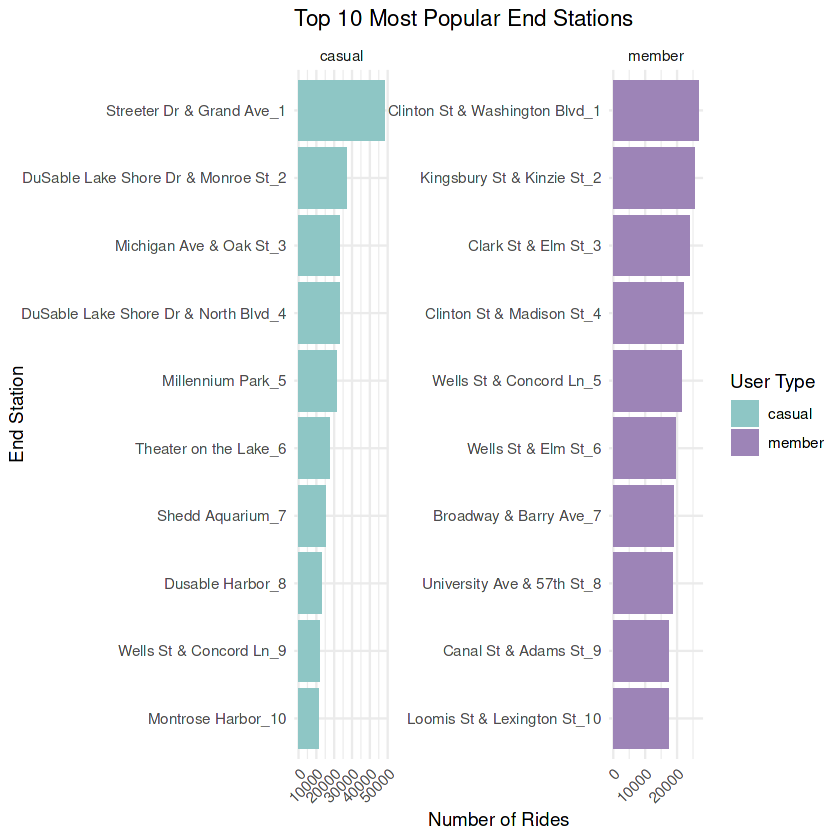

In [32]:
ggplot(top_end_stations, aes(x = number_of_rides, y = end_station_name, fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Top 10 Most Popular End Stations",
       x = "Number of Rides",
       y = "End Station",
       fill = "User Type") +
  scale_fill_manual(values = c("member" = "#9D84B7", "casual" = "#8EC6C5")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  facet_wrap(~ member_casual, scales = "free")


**Result:** I manually explored several station names using Google Maps to determine their closeness to universities, workplaces, and tourist attractions. The results indicated that when it comes to station selection, casual riders opt for stations in close proximity to popular tourist destinations such as museums and beaches, while members seem to favor stations closer to business centers and educational institutions.


<a id="Share-Phase"></a>
## 5. Share Phase


Based on my analysis, here is a brief overview of the differences between members and casual riders:


- Members account for 63.98% of total rides, while casual riders make up 36.02%.
- Classic bikes are preferred by members, with a total of 1,778,636 rides, while casual riders opt for electric bikes, totaling 1,028,217 rides.
- Casual riders tend to have increased ride counts and longer durations on weekends, while members maintain consistent weekday usage patterns.
- Casual riders peak in the afternoon and early evening, specifically from 12 PM to 6 PM, while members have consistent usage throughout the day with peaks during morning and evening commutes.
- Both members and casual riders experience increased ride counts and longer durations during the summer months, while activity decreases during the colder months.
- Casual riders tend to use stations near tourist spots, while members prefer stations near business areas, universities, and schools.



<a id="Act-Phase"></a>
##  6. Act Phase
 
* A well-structured pricing plan can effectively convey the financial advantages of an annual membership compared to single-ride or full-day passes for casual riders. This plan will emphasize the long-term benefits, highlighting the significant savings and additional perks that come with an annual membership. By clearly communicating these advantages, potential customers will be able to make an informed decision and recognize the value of choosing an annual membership. 

* Strategic partnerships and collaborations with local businesses and tourist attractions in popular areas for casual riders can open up a world of opportunities. These partnerships allow us to offer joint promotional discounts and limited-time offers, enticing more individuals to sign up for annual memberships. This not only benefits our company but also strengthens the local economy and fosters a sense of community among riders and businesses. Together, we can create a win-win situation that  drives growth and enhances the overall experience for riders in these areas.
 
* We can boost the chances of casual riders switching to a full annual membership by customizing our promotions to meet their specific needs and preferences. Offering discounted weekly or monthly passes during peak periods could motivate them to see the advantages of a more long-term commitment.This approach not only addresses their immediate needs but also lays the foundation for a more sustainable and lasting relationship with our services.
